## Name : Adwaiy Singh
## Reg. No. : 220968424
## Sec. : A
## Batch: 2
## WEEK 4

# Question 1

## Solving the Symmetric Traveling Salesman Problem (sTSP) Using Variants of Hill Climbing 

### Algorithms 
### Objective 
The objective of this study is to analyze, implement, and compare multiple Hill Climbing 
algorithms for solving the Symmetric Traveling Salesman Problem (sTSP). The sTSP requires 
finding the shortest possible route that visits each city exactly once and returns to the starting 
point, with symmetric distances between cities. 
This research aims to evaluate the strengths and weaknesses of different Hill Climbing 
strategies in optimizing tour length, computational efficiency, and convergence behavior. 
#### Specifically, we will examine: 
    • Simple Hill Climbing 
    • Stochastic Hill Climbing 
    • Steepest Ascent Hill Climbing 
By conducting experiments on benchmark datasets, we will assess the effectiveness of each 
algorithm and provide insights into their suitability for solving the sTSP.

## Scope of Work

### 1. Data Processing 
    o Parse and preprocess TSP datasets from TSPLIB95. 
    o Extract city coordinates and compute the corresponding distance matrix. 

In [1]:
import requests
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time
import pandas as pd

In [2]:
files = [
    {"name": "rd100.tsp", "url": "https://raw.githubusercontent.com/rhgrant10/tsplib95/master/archives/problems/tsp/rd100.tsp"},
    {"name": "eil101.tsp", "url": "https://raw.githubusercontent.com/rhgrant10/tsplib95/master/archives/problems/tsp/eil101.tsp"},
    {"name": "a280.tsp", "url": "https://raw.githubusercontent.com/rhgrant10/tsplib95/master/archives/problems/tsp/a280.tsp"},
    {"name": "d198.tsp", "url": "https://raw.githubusercontent.com/rhgrant10/tsplib95/master/archives/problems/tsp/d198.tsp"},
    {"name": "ch150.tsp", "url": "https://raw.githubusercontent.com/rhgrant10/tsplib95/master/archives/problems/tsp/ch150.tsp"}
]

In [3]:
def download_file(url, filename):
    print(f"Downloading {filename}...")
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, 'wb') as f:
            f.write(response.content)
        print(f"{filename} downloaded successfully!")
    else:
        print(f"Failed to download {filename}!")

In [4]:
for file in files:
    download_file(file["url"], file["name"])

rd100.tsp downloaded successfully!
eil101.tsp downloaded successfully!
a280.tsp downloaded successfully!
d198.tsp downloaded successfully!
ch150.tsp downloaded successfully!


In [5]:
def parse_tsp_file(file_path):
    cities = []
    with open(file_path, 'r') as f:
        lines = f.readlines()
        
        start_reading = False
        for line in lines:
            if line.strip() == "NODE_COORD_SECTION":
                start_reading = True
                continue
            if start_reading:
                if line.strip() == "EOF":
                    break
                parts = line.split()
                city_index = int(parts[0])
                x = float(parts[1])
                y = float(parts[2])
                cities.append((x, y))
                
    return cities

In [6]:
def compute_distance(city1, city2):
    x1, y1 = city1
    x2, y2 = city2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

In [7]:
def create_distance_matrix(cities):
    num_cities = len(cities)
    dist_matrix = [[0] * num_cities for _ in range(num_cities)]
    
    for i in range(num_cities):
        for j in range(i + 1, num_cities):
            dist = compute_distance(cities[i], cities[j])
            dist_matrix[i][j] = dist
            dist_matrix[j][i] = dist
    
    return dist_matrix

In [8]:
def plot_distance_matrix_heatmap(dist_matrix):
    plt.figure(figsize=(10, 8))
    sns.heatmap(dist_matrix, cmap="YlGnBu", annot=False, fmt=".2f", square=True)
    plt.title("Distance Matrix Heatmap", fontsize=16)
    plt.xlabel("City Index", fontsize=12)
    plt.ylabel("City Index", fontsize=12)
    plt.show()

In [9]:
def process_tsp_file(file_path):
    cities_rd100 = parse_tsp_file(file_path)

    print(f"Processing {file_path}...")

    print("\nNumber of cities:", len(cities_rd100))

    print(f"\nCity Coordinates for {file_path}:")
    for idx, city in enumerate(cities_rd100, start=1):
        print(f"City {idx}: {city}")

    distance_matrix_rd100 = create_distance_matrix(cities_rd100)

    plot_distance_matrix_heatmap(distance_matrix_rd100)

#### rd100.tsp

Processing rd100.tsp...

Number of cities: 100

City Coordinates for rd100.tsp:
City 1: (143.775, 862.63)
City 2: (881.78, 1.18319)
City 3: (545.244, 735.005)
City 4: (502.813, 876.001)
City 5: (204.876, 345.225)
City 6: (701.637, 576.987)
City 7: (147.167, 164.286)
City 8: (135.382, 807.91)
City 9: (628.999, 976.971)
City 10: (674.999, 731.447)
City 11: (313.696, 299.126)
City 12: (445.689, 981.97)
City 13: (354.793, 765.215)
City 14: (398.129, 976.034)
City 15: (273.041, 853.944)
City 16: (666.295, 312.27)
City 17: (876.942, 925.39)
City 18: (134.026, 949.816)
City 19: (966.825, 726.799)
City 20: (659.346, 889.08)
City 21: (400.34, 874.489)
City 22: (118.041, 312.04)
City 23: (809.87, 50.8555)
City 24: (16.2821, 114.161)
City 25: (12.6192, 48.2407)
City 26: (650.039, 940.261)
City 27: (791.189, 758.951)
City 28: (907.194, 612.605)
City 29: (510.857, 25.8629)
City 30: (31.6366, 431.221)
City 31: (776.763, 253.781)
City 32: (531.819, 906.89)
City 33: (654.965, 767.759)
City 34: (186.06

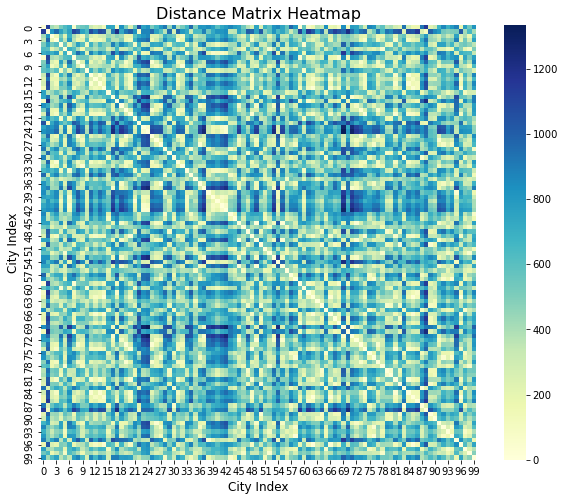

In [10]:
process_tsp_file("rd100.tsp")

#### eil101.tsp

Processing eil101.tsp...

Number of cities: 101

City Coordinates for eil101.tsp:
City 1: (41.0, 49.0)
City 2: (35.0, 17.0)
City 3: (55.0, 45.0)
City 4: (55.0, 20.0)
City 5: (15.0, 30.0)
City 6: (25.0, 30.0)
City 7: (20.0, 50.0)
City 8: (10.0, 43.0)
City 9: (55.0, 60.0)
City 10: (30.0, 60.0)
City 11: (20.0, 65.0)
City 12: (50.0, 35.0)
City 13: (30.0, 25.0)
City 14: (15.0, 10.0)
City 15: (30.0, 5.0)
City 16: (10.0, 20.0)
City 17: (5.0, 30.0)
City 18: (20.0, 40.0)
City 19: (15.0, 60.0)
City 20: (45.0, 65.0)
City 21: (45.0, 20.0)
City 22: (45.0, 10.0)
City 23: (55.0, 5.0)
City 24: (65.0, 35.0)
City 25: (65.0, 20.0)
City 26: (45.0, 30.0)
City 27: (35.0, 40.0)
City 28: (41.0, 37.0)
City 29: (64.0, 42.0)
City 30: (40.0, 60.0)
City 31: (31.0, 52.0)
City 32: (35.0, 69.0)
City 33: (53.0, 52.0)
City 34: (65.0, 55.0)
City 35: (63.0, 65.0)
City 36: (2.0, 60.0)
City 37: (20.0, 20.0)
City 38: (5.0, 5.0)
City 39: (60.0, 12.0)
City 40: (40.0, 25.0)
City 41: (42.0, 7.0)
City 42: (24.0, 12.0)
City 43: (

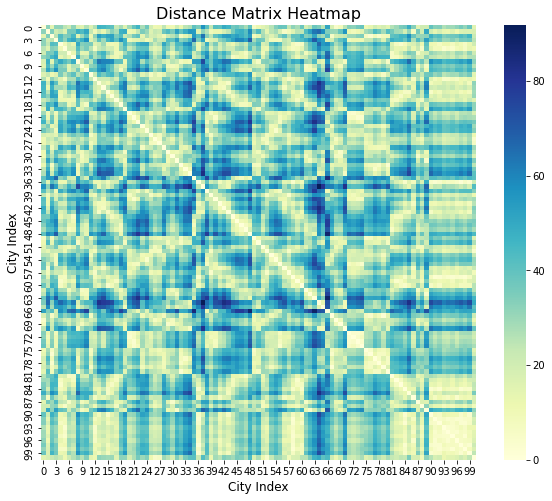

In [11]:
process_tsp_file("eil101.tsp")

#### a280.tsp 

Processing eil101.tsp...

Number of cities: 101

City Coordinates for eil101.tsp:
City 1: (41.0, 49.0)
City 2: (35.0, 17.0)
City 3: (55.0, 45.0)
City 4: (55.0, 20.0)
City 5: (15.0, 30.0)
City 6: (25.0, 30.0)
City 7: (20.0, 50.0)
City 8: (10.0, 43.0)
City 9: (55.0, 60.0)
City 10: (30.0, 60.0)
City 11: (20.0, 65.0)
City 12: (50.0, 35.0)
City 13: (30.0, 25.0)
City 14: (15.0, 10.0)
City 15: (30.0, 5.0)
City 16: (10.0, 20.0)
City 17: (5.0, 30.0)
City 18: (20.0, 40.0)
City 19: (15.0, 60.0)
City 20: (45.0, 65.0)
City 21: (45.0, 20.0)
City 22: (45.0, 10.0)
City 23: (55.0, 5.0)
City 24: (65.0, 35.0)
City 25: (65.0, 20.0)
City 26: (45.0, 30.0)
City 27: (35.0, 40.0)
City 28: (41.0, 37.0)
City 29: (64.0, 42.0)
City 30: (40.0, 60.0)
City 31: (31.0, 52.0)
City 32: (35.0, 69.0)
City 33: (53.0, 52.0)
City 34: (65.0, 55.0)
City 35: (63.0, 65.0)
City 36: (2.0, 60.0)
City 37: (20.0, 20.0)
City 38: (5.0, 5.0)
City 39: (60.0, 12.0)
City 40: (40.0, 25.0)
City 41: (42.0, 7.0)
City 42: (24.0, 12.0)
City 43: (

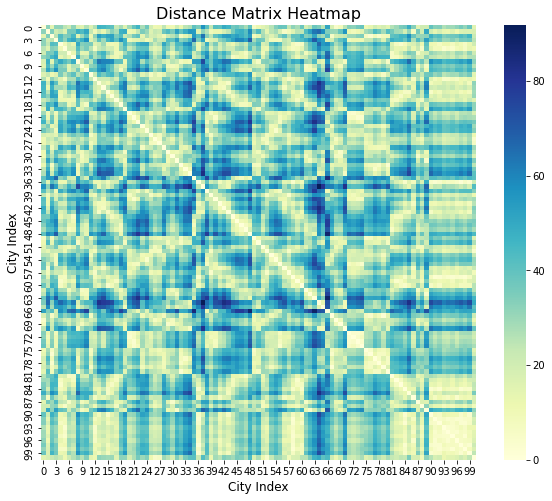

In [12]:
process_tsp_file("eil101.tsp")

#### d198.tsp 

Processing d198.tsp...

Number of cities: 198

City Coordinates for d198.tsp:
City 1: (0.0, 0.0)
City 2: (551.2, 996.4)
City 3: (627.4, 996.4)
City 4: (703.6, 996.4)
City 5: (703.6, 1047.2)
City 6: (627.4, 1047.2)
City 7: (551.2, 1047.2)
City 8: (881.4, 1352.0)
City 9: (932.2, 1352.0)
City 10: (957.6, 1352.0)
City 11: (983.0, 1352.0)
City 12: (1008.4, 1352.0)
City 13: (1033.8, 1352.0)
City 14: (1313.2, 1123.4)
City 15: (1287.8, 1098.0)
City 16: (1287.8, 996.4)
City 17: (1313.2, 996.4)
City 18: (1465.6, 996.4)
City 19: (1516.4, 996.4)
City 20: (1592.6, 996.4)
City 21: (1592.6, 1098.0)
City 22: (1516.4, 1098.0)
City 23: (1465.6, 1098.0)
City 24: (1567.2, 1123.4)
City 25: (1592.6, 1148.8)
City 26: (1567.2, 1174.2)
City 27: (1541.8, 1174.2)
City 28: (1491.0, 1174.2)
City 29: (1440.2, 1174.2)
City 30: (1465.6, 1199.6)
City 31: (1414.8, 1225.0)
City 32: (1440.2, 1225.0)
City 33: (1491.0, 1225.0)
City 34: (1516.4, 1225.0)
City 35: (1592.6, 1250.4)
City 36: (1465.6, 1250.4)
City 37: (1440.2, 1

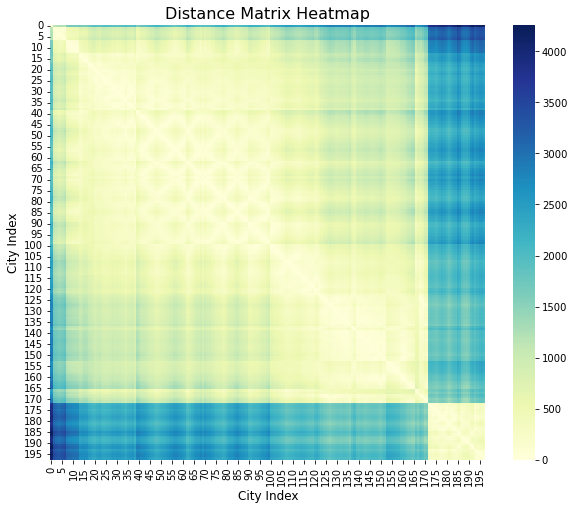

In [13]:
process_tsp_file("d198.tsp")

#### ch150.tsp

Processing ch150.tsp...

Number of cities: 150

City Coordinates for ch150.tsp:
City 1: (37.4393516691, 541.2090699418)
City 2: (612.1759508571, 494.3166877396)
City 3: (38.1312338227, 353.1484581781)
City 4: (53.4418081065, 131.484901365)
City 5: (143.0606355347, 631.7200953923)
City 6: (689.9451267256, 468.5354998742)
City 7: (112.7478815786, 529.417757826)
City 8: (141.4875865042, 504.818485571)
City 9: (661.0513901702, 445.9375182115)
City 10: (98.7899036592, 384.5926031158)
City 11: (697.3881696597, 180.3962284275)
City 12: (536.4894189738, 287.2279085051)
City 13: (192.4067320507, 20.439405931)
City 14: (282.7865258765, 229.8001556189)
City 15: (240.8251726391, 281.51414372)
City 16: (246.9281323057, 322.461332116)
City 17: (649.7313216456, 62.3331575282)
City 18: (352.96585626, 666.7873101942)
City 19: (633.392367658, 534.9398453712)
City 20: (488.311799404, 437.4869439948)
City 21: (141.4039286509, 228.4325551488)
City 22: (17.3632612602, 240.2407068508)
City 23: (397.558645138

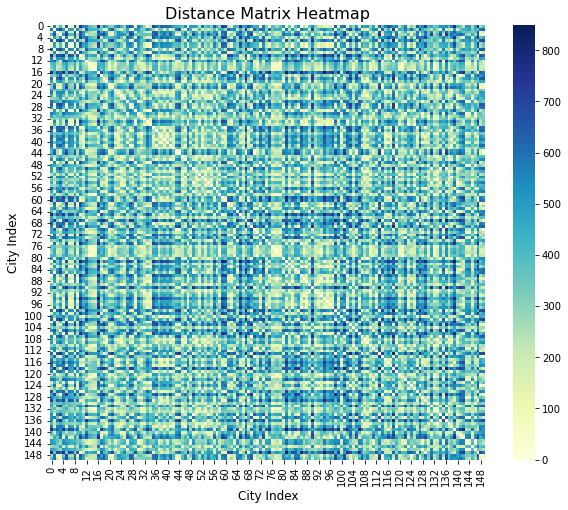

In [14]:
process_tsp_file("ch150.tsp")

### 2. Algorithm Implementation 
    o Implement Simple Hill Climbing, Stochastic Hill Climbing, and Steepest  Ascent Hill Climbing for solving TSP. 
    o Ensure efficient solution representation and neighborhood search strategies.

In [25]:
def total_distance(tour, distance_matrix):
    return sum(distance_matrix[tour[i]][tour[i + 1]] for i in range(len(tour) - 1)) + distance_matrix[tour[-1]][tour[0]]

In [26]:
def generate_neighbors(solution):
    neighbors = []
    for i in range(len(solution)):
        for j in range(i + 1, len(solution)):
            new_solution = solution[:]
            new_solution[i], new_solution[j] = new_solution[j], new_solution[i]
            neighbors.append(new_solution)
    return neighbors

In [27]:
def plot_tour(tour, cities, title):
        tour_coords = [cities[i] for i in tour] + [cities[tour[0]]]
        x, y = zip(*tour_coords)
        plt.plot(x, y, marker='o')
        plt.title(title)
        plt.xlabel("X Coordinate")
        plt.ylabel("Y Coordinate")
        plt.show()

In [28]:
def hill_climbing(distance_matrix, initial_tour, strategy='simple'):
    current_tour = initial_tour.copy()
    current_cost = total_distance(current_tour, distance_matrix)
    iterations = 0

    while True:
        neighbors = generate_neighbors(current_tour)
        if strategy == 'simple':
            best_neighbor = next((neighbor for neighbor in neighbors if total_distance(neighbor, distance_matrix) < current_cost), None)

        elif strategy == 'stochastic':
            improving_neighbors = [neighbor for neighbor in neighbors if total_distance(neighbor, distance_matrix) < current_cost]
            if improving_neighbors:
                best_neighbor = random.choice(improving_neighbors)
            else:
                best_neighbor = None

        elif strategy == 'steepest':
            best_neighbor = min(neighbors, key=lambda tour: total_distance(tour, distance_matrix))

        if best_neighbor:
            best_cost = total_distance(best_neighbor, distance_matrix)
            if best_cost < current_cost:
                current_tour = best_neighbor
                current_cost = best_cost
                iterations += 1
            else:
                break  
        else:
            break  

    return current_tour, current_cost, iterations

In [44]:
def solve_tsp_with_hill_climbing(file_path):
    cities = parse_tsp_file(file_path)
    distance_matrix = create_distance_matrix(cities)
    
    initial_tour = list(range(len(cities)))
    
    # Simple Hill Climbing
    start_time = time.time()
    tour_simple, cost_simple, iterations_simple = hill_climbing(distance_matrix, initial_tour, strategy='simple')
    time_simple = time.time() - start_time

    # Stochastic Hill Climbing
    start_time = time.time()
    tour_stochastic, cost_stochastic, iterations_stochastic = hill_climbing(distance_matrix, initial_tour, strategy='stochastic')
    time_stochastic = time.time() - start_time

    # Steepest Ascent Hill Climbing
    start_time = time.time()
    tour_steepest, cost_steepest, iterations_steepest = hill_climbing(distance_matrix, initial_tour, strategy='steepest')
    time_steepest = time.time() - start_time

    results_df = pd.DataFrame({
        'Algorithm': ['Simple', 'Stochastic', 'Steepest'],
        'Cost': [round(cost_simple, 2), round(cost_stochastic, 2), round(cost_steepest, 2)],
        'Iterations': [iterations_simple, iterations_stochastic, iterations_steepest],
        'Time (s)': [round(time_simple, 4), round(time_stochastic, 4), round(time_steepest, 4)]
    })
    
    print("Running TSP file:", file_path.split('/')[-1])
    print("\nComparison Table for")
    print(results_df)

    plot_tour(tour_simple, cities, 'Simple Hill Climbing Tour')
    plot_tour(tour_stochastic, cities, 'Stochastic Hill Climbing Tour')
    plot_tour(tour_steepest, cities, 'Steepest Ascent Hill Climbing Tour')
    
    return results_df

### 3. Experimental Evaluation 
    o Run the algorithms on benchmark datasets: 
        ▪ rd100.tsp 
        ▪ eil101.tsp 
        ▪ a280.tsp 
        ▪ d198.tsp 
        ▪ ch150.tsp 
    o Compare performance based on: 
        ▪ Solution quality (total tour distance) 
        ▪ Convergence behavior (iterations to reach a solution) 
        ▪ Computational time

#### rd100.tsp

Running TSP file: rd100.tsp

Comparison Table for
    Algorithm      Cost  Iterations  Time (s)
0      Simple  14600.73         393    4.0800
1  Stochastic  14241.58         321   11.4818
2    Steepest  11904.34         133    4.7958


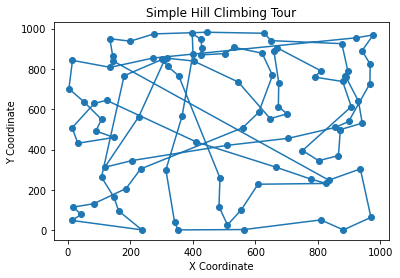

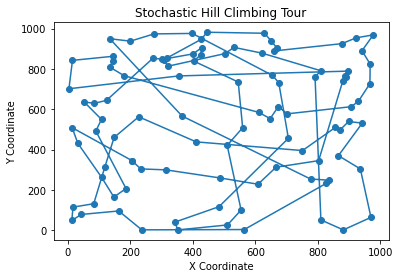

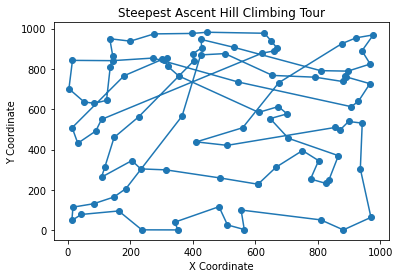

In [45]:
r100_df = solve_tsp_with_hill_climbing("rd100.tsp")

#### eil101.tsp

Running TSP file: eil101.tsp

Comparison Table for
    Algorithm     Cost  Iterations  Time (s)
0      Simple   994.92         277    3.0781
1  Stochastic  1013.46         218    8.2403
2    Steepest   974.26          89    3.3552


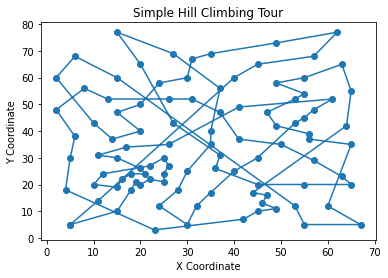

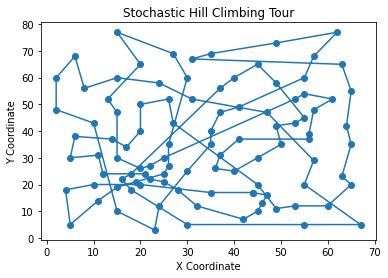

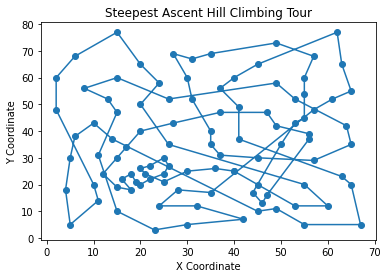

In [46]:
eil101_df = solve_tsp_with_hill_climbing("eil101.tsp")

#### a280.tsp 

Running TSP file: a280.tsp 

Comparison Table for
    Algorithm     Cost  Iterations  Time (s)
0      Simple  2793.03           8    3.4698
1  Stochastic  2793.03           8    6.9559
2    Steepest  2793.03           6    5.3345


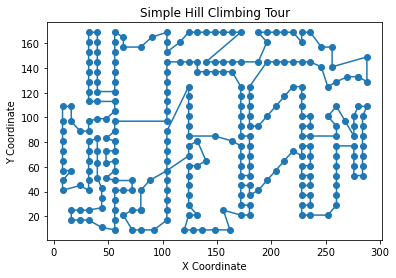

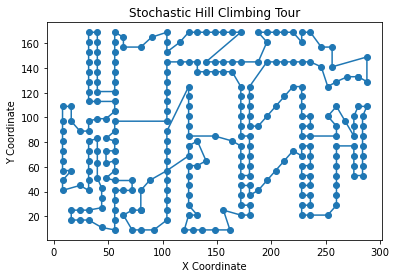

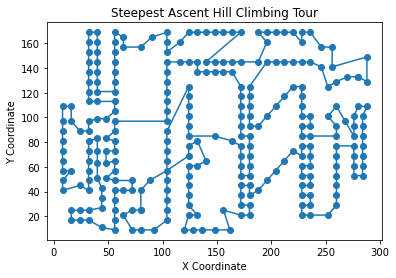

In [47]:
a280_df = solve_tsp_with_hill_climbing("a280.tsp ")

#### d198.tsp 

Running TSP file: d198.tsp

Comparison Table for
    Algorithm      Cost  Iterations  Time (s)
0      Simple  20919.73          92   16.9694
1  Stochastic  21064.56          56   15.2713
2    Steepest  20806.73          44   12.1300


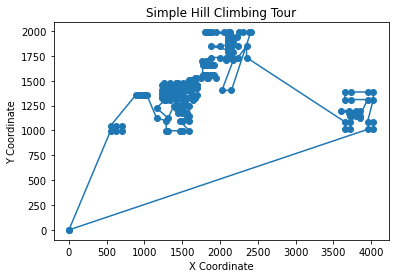

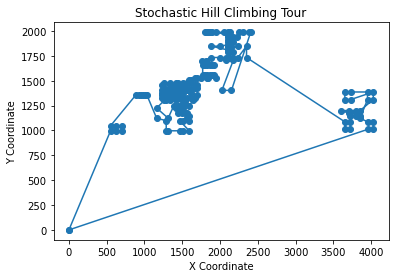

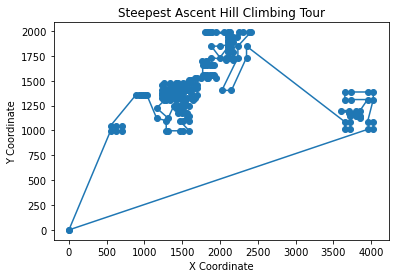

In [48]:
d198_df = solve_tsp_with_hill_climbing("d198.tsp")

#### ch150.tsp

Running TSP file: ch150.tsp

Comparison Table for
    Algorithm      Cost  Iterations  Time (s)
0      Simple  10234.51         740   22.3431
1  Stochastic  12158.43         476   59.6659
2    Steepest  13560.25         191   23.1845


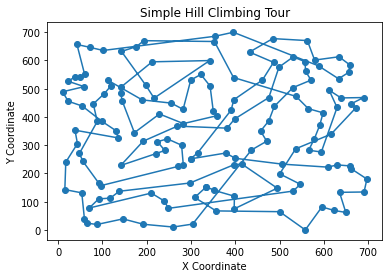

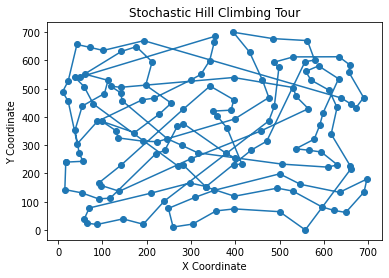

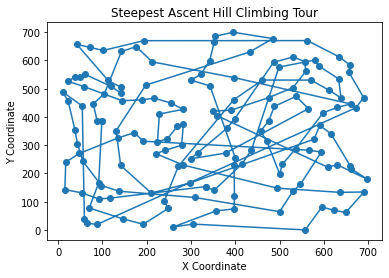

In [49]:
ch150_df = solve_tsp_with_hill_climbing("ch150.tsp")

### 4. Comparative Analysis & Insights 
    o Identify which algorithm produces the best results for different datasets. 
    o Analyze trade-offs between solution quality and runtime. 
    o Discuss algorithmic limitations and potential improvements. 

In [53]:
r100_df['Dataset'] = 'rd100'
eil101_df['Dataset'] = 'eil101'
a280_df['Dataset'] = 'a280'
d198_df['Dataset'] = 'd198'
ch150_df['Dataset'] = 'ch150'

combined_df = pd.concat([r100_df, eil101_df, a280_df, d198_df, ch150_df], ignore_index=True)

print("Combined Comparison Table for all Datasets:\n")
print(combined_df)

Combined Comparison Table for all Datasets:

     Algorithm      Cost  Iterations  Time (s) Dataset
0       Simple  14600.73         393    4.0800   rd100
1   Stochastic  14241.58         321   11.4818   rd100
2     Steepest  11904.34         133    4.7958   rd100
3       Simple    994.92         277    3.0781  eil101
4   Stochastic   1013.46         218    8.2403  eil101
5     Steepest    974.26          89    3.3552  eil101
6       Simple   2793.03           8    3.4698    a280
7   Stochastic   2793.03           8    6.9559    a280
8     Steepest   2793.03           6    5.3345    a280
9       Simple  20919.73          92   16.9694    d198
10  Stochastic  21064.56          56   15.2713    d198
11    Steepest  20806.73          44   12.1300    d198
12      Simple  10234.51         740   22.3431   ch150
13  Stochastic  12158.43         476   59.6659   ch150
14    Steepest  13560.25         191   23.1845   ch150


### Result

#### 1. Algorithm produces the best results for different datasets
    rd100: Steepest Ascent Hill Climbing
    eil101: Steepest Ascent Hill Climbing
    a280: Steepest Ascent Hill Climbing
    d198: Steepest Ascent Hill Climbing
    ch150: Simple Hill Climbing

#### 2. Trade-offs between solution quality and runtime

##### Solution Quality:
    Steepest Hill Climbing provides the best solutions in terms of cost, as it evaluates all neighbors and picks the best move. This thorough search leads to better outcomes but at the cost of increased runtime.
    
##### Runtime:
    Simple Hill Climbing is the fastest, as it only makes the first improvement it finds, but it often leads to suboptimal solutions because it may get stuck in local minima.
    
##### Balance:
    Stochastic Hill Climbing strikes a balance between quality and runtime. While slower than Simple, it introduces randomness, which can help avoid local minima and explore better solutions.

#### 3. Algorithmic limitations and potential improvements

##### Limitations:
    Local Minima: All three algorithms (Simple, Stochastic, Steepest) can get stuck in local minima because they are local search algorithms. They only explore neighbors of the current solution, and there is no guarantee they will find the global minimum.

    Scalability: As the number of cities increases, the performance of these algorithms may degrade. Steepest Hill Climbing becomes slower as it evaluates more neighbors, which can be computationally expensive for large datasets.
    
##### Potential Improvements:
    Simulated Annealing: This algorithm could be introduced to overcome the local minima problem. By allowing occasional worse moves (controlled by a temperature parameter), it could escape local minima and explore the solution space more thoroughly.

    Genetic Algorithms: A population-based approach like genetic algorithms could help maintain a diverse set of solutions, preventing the search from converging too early.

    Tabu Search: This is another improvement that could help avoid cycling between the same solutions by maintaining a list of previously visited solutions and prohibiting revisiting them.

    Parallelization: To handle larger datasets more efficiently, parallelizing the exploration of neighbors or running multiple instances of the algorithm could reduce the computation time significantly.